In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split

In [85]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [86]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport',
       'sqft_lotlog'],
      dtype='object')

In [87]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,sqft_lotlog
0,2014-12-09,538000.0,-0.402000,0.238847,0.694837,-0.244157,2.0,0.0,0.0,3,7,98125,0.675397,-0.631124,1,1,0,-0.271296,0.990375,-0.031909
1,2015-02-25,180000.0,-1.548490,-1.491722,-1.540952,-0.048304,1.0,0.0,0.0,3,6,98028,1.287341,1.365915,0,0,1,-0.089181,1.228156,0.378194
2,2014-12-09,604000.0,0.744489,1.277188,-0.062847,-0.403368,1.0,0.0,0.0,5,7,98136,0.199441,0.264100,1,1,0,-0.477637,-1.106864,-0.502726
3,2015-02-18,510000.0,-0.402000,-0.107267,-0.410636,-0.184649,1.0,0.0,0.0,3,8,98074,-0.548491,-0.493397,0,0,1,-0.367417,0.607405,0.107247
5,2014-06-27,257500.0,-0.402000,0.238847,-0.367163,-0.274196,2.0,0.0,0.0,3,7,98003,-0.820466,-0.768851,0,0,0,1.851889,-0.683999,-0.108398


In [88]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [97]:
tomodel = ['price','bedrooms', 'bathrooms', 'sqft_living','sqft_lotlog',
       'floors', 'waterfront', 'condition', 'grade', 
       'Age_of_House', 'Years_last_renovation', 'basement',
       'distance_from_a_city', 'distance_from_airport', 'biggerliving',
       'biggerlot', 'bedbath']

In [98]:
newdf = df[tomodel]

In [99]:
x_cols = list(newdf.columns)
x_cols.remove('price')

In [100]:
X =newdf[x_cols]
y = newdf['price']

In [101]:
X

,bedrooms,bathrooms,sqft_living,sqft_lotlog,floors,waterfront,condition,grade,Age_of_House,Years_last_renovation,basement,distance_from_a_city,distance_from_airport,biggerliving,biggerlot,bedbath
0,-0.402000,0.238847,0.694837,-0.031909,2.0,0.0,3,7,0.675397,-0.631124,1,-0.271296,0.990375,1,0,-0.096017
1,-1.548490,-1.491722,-1.540952,0.378194,1.0,0.0,3,6,1.287341,1.365915,0,-0.089181,1.228156,0,1,2.309916
2,0.744489,1.277188,-0.062847,-0.502726,1.0,0.0,5,7,0.199441,0.264100,1,-0.477637,-1.106864,1,0,0.950853
3,-0.402000,-0.107267,-0.410636,0.107247,1.0,0.0,3,8,-0.548491,-0.493397,0,-0.367417,0.607405,0,1,0.043121
5,-0.402000,0.238847,-0.367163,-0.108398,2.0,0.0,3,7,-0.820466,-0.768851,0,1.851889,-0.683999,0,0,-0.096017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,-0.402000,0.584961,-0.870215,-2.220600,2.0,0.0,3,8,-1.262425,-1.216463,1,-0.903097,-0.482269,0,1,-0.235154
19217,-0.402000,0.584961,-0.596952,-2.391708,3.0,0.0,3,8,-1.296422,-1.250894,0,-0.523204,0.753423,0,0,-0.235154
19218,0.744489,0.584961,0.371890,-0.311254,2.0,0.0,3,8,-1.466407,-1.423053,0,-0.438150,-1.345185,1,0,0.435497
19219,-1.548490,-1.837835,-1.230426,-2.166756,2.0,0.0,3,7,-1.296422,-1.250894,0,-1.254262,-0.497242,0,0,2.845869


In [102]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          1.965e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:26:23   Log-Likelihood:                     -2.4291e+05
No. Observations:               18321   AIC:                                  4.859e+05
Df Residuals:                   18306   BIC:                                  4.860e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.778e+04   1342.203    -13.246      0.000   -2.04e+04   -1.51e+04
bathrooms              2.335e+04   1827.342     12.780      0.000    1.98e+04    2.69e+04
sqft_living            1.412e+05   2001.601     70.534      0.000    1.37e+05    1.45e+05
sqft_lotlog            5265.2388   1444.968      3.644      0.000    2432.967    8097.511
floors                -1781.2689   2810.522     -0.634      0.526   -7290.156    3727.618
waterfront            -2.206e-12   7.11e-13     -3.103      0.002    -3.6e-12   -8.12e-13
condition              1.905e+04   1582.534     12.035      0.000    1.59e+04    2.21e+04
grade                   6.22e+04    904.585     68.764      0.000    6.04e+04     6.4e+04
Age_of_House            6.21e+04   2879.403     21.567      0.000    5.65e+04    6.77e+04
Years_last_renovation -1.992e+04   2922.953     -6.815      0.000   -2.57e+04   -1.42e+04
basement              -1.927e+04   2508.947     -7.679      0.000   -2.42e+04   -1.43e+04
distance_from_a_city  -1.075e+05   1211.050    -88.737      0.000    -1.1e+05   -1.05e+05
distance_from_airport  3.911e+04   1045.971     37.395      0.000    3.71e+04    4.12e+04
biggerliving          -4.438e+04   2453.849    -18.084      0.000   -4.92e+04   -3.96e+04
biggerlot             -7698.5560   2211.408     -3.481      0.001    -1.2e+04   -3363.990
bedbath                5043.5678    911.713      5.532      0.000    3256.525    6830.611
==============================================================================
Omnibus:                     6947.630   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46514.912
Skew:                           1.672   Prob(JB):                         0.00
Kurtosis:                      10.054   Cond. No.                     1.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [103]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

16 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lotlog', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.778e+04,1342.203,-13.246,0.000,-2.04e+04,-1.51e+04
bathrooms,2.335e+04,1827.342,12.780,0.000,1.98e+04,2.69e+04
sqft_living,1.412e+05,2001.601,70.534,0.000,1.37e+05,1.45e+05
sqft_lotlog,5265.2388,1444.968,3.644,0.000,2432.967,8097.511
floors,-1781.2689,2810.522,-0.634,0.526,-7290.156,3727.618


In [104]:
X = newdf[x_cols]
y= newdf['price']

In [105]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.941
Method:                 Least Squares   F-statistic:                          2.106e+04
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:26:26   Log-Likelihood:                     -2.4291e+05
No. Observations:               18321   AIC:                                  4.859e+05
Df Residuals:                   18307   BIC:                                  4.860e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.777e+04   1342.075    -13.240      0.000   -2.04e+04   -1.51e+04
bathrooms              2.314e+04   1795.313     12.888      0.000    1.96e+04    2.67e+04
sqft_living            1.412e+05   2001.468     70.532      0.000    1.37e+05    1.45e+05
sqft_lotlog            5657.0798   1306.000      4.332      0.000    3097.197    8216.963
waterfront             1.069e-11   9.09e-13     11.752      0.000     8.9e-12    1.25e-11
condition              1.902e+04   1581.898     12.023      0.000    1.59e+04    2.21e+04
grade                  6.185e+04    711.637     86.911      0.000    6.05e+04    6.32e+04
Age_of_House           6.215e+04   2878.464     21.590      0.000    5.65e+04    6.78e+04
Years_last_renovation -1.985e+04   2920.893     -6.797      0.000   -2.56e+04   -1.41e+04
basement              -1.864e+04   2303.549     -8.091      0.000   -2.32e+04   -1.41e+04
distance_from_a_city  -1.075e+05   1210.841    -88.764      0.000    -1.1e+05   -1.05e+05
distance_from_airport  3.909e+04   1045.384     37.395      0.000     3.7e+04    4.11e+04
biggerliving          -4.453e+04   2442.439    -18.230      0.000   -4.93e+04   -3.97e+04
biggerlot             -7817.0794   2203.450     -3.548      0.000   -1.21e+04   -3498.111
bedbath                5083.1191    909.560      5.589      0.000    3300.296    6865.942
==============================================================================
Omnibus:                     6951.495   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46596.267
Skew:                           1.672   Prob(JB):                         0.00
Kurtosis:                      10.061   Cond. No.                     3.14e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [106]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = newdf[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[('bedrooms', 1.7151334071571382),
 ('bathrooms', 3.069196118572384),
 ('sqft_living', 3.8145361069154524),
 ('sqft_lotlog', 1.6241679183136124),
 ('waterfront', nan),
 ('condition', 28.687770585365374),
 ('grade', 28.381131100134866),
 ('Age_of_House', 7.889798684832406),
 ('Years_last_renovation', 8.124105070672636),
 ('basement', 1.9113797560577832),
 ('distance_from_a_city', 1.3961062818152068),
 ('distance_from_airport', 1.0406284490303412),
 ('biggerliving', 2.540442051406233),
 ('biggerlot', 1.8101985518576256),
 ('bedbath', 1.2467594164923332)]

In [107]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

15 10


In [108]:
X = newdf[x_cols]
y= newdf['price']

In [109]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              3838.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:26:45   Log-Likelihood:                     -2.5857e+05
No. Observations:               18321   AIC:                                  5.172e+05
Df Residuals:                   18311   BIC:                                  5.172e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -4.524e+04   3110.673    -14.543      0.000   -5.13e+04   -3.91e+04
bathrooms              1.965e+04   3803.063      5.167      0.000    1.22e+04    2.71e+04
sqft_living            7.686e+04   4404.138     17.452      0.000    6.82e+04    8.55e+04
sqft_lotlog           -7346.1051   2981.980     -2.463      0.014   -1.32e+04   -1501.146
basement                2.22e+05   4910.398     45.208      0.000    2.12e+05    2.32e+05
distance_from_a_city  -9.664e+04   2629.675    -36.749      0.000   -1.02e+05   -9.15e+04
distance_from_airport  5.905e+04   2445.739     24.144      0.000    5.43e+04    6.38e+04
biggerliving           2.748e+05   5013.673     54.817      0.000    2.65e+05    2.85e+05
biggerlot              2.601e+05   4673.440     55.650      0.000    2.51e+05    2.69e+05
bedbath                8.123e+04   2028.407     40.045      0.000    7.73e+04    8.52e+04
==============================================================================
Omnibus:                      299.188   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.321
Skew:                           0.162   Prob(JB):                    1.01e-103
Kurtosis:                       3.719   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

10 10
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lotlog', 'basement']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-4.524e+04,3110.673,-14.543,0.000,-5.13e+04,-3.91e+04
bathrooms,1.965e+04,3803.063,5.167,0.000,1.22e+04,2.71e+04
sqft_living,7.686e+04,4404.138,17.452,0.000,6.82e+04,8.55e+04
sqft_lotlog,-7346.1051,2981.980,-2.463,0.014,-1.32e+04,-1501.146
basement,2.22e+05,4910.398,45.208,0.000,2.12e+05,2.32e+05


In [111]:
X = newdf[x_cols]
y= newdf['price']

In [112]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.677
Model:                            OLS   Adj. R-squared (uncentered):              0.677
Method:                 Least Squares   F-statistic:                              3838.
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                        0.00
Time:                        17:26:52   Log-Likelihood:                     -2.5857e+05
No. Observations:               18321   AIC:                                  5.172e+05
Df Residuals:                   18311   BIC:                                  5.172e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -4.524e+04   3110.673    -14.543      0.000   -5.13e+04   -3.91e+04
bathrooms              1.965e+04   3803.063      5.167      0.000    1.22e+04    2.71e+04
sqft_living            7.686e+04   4404.138     17.452      0.000    6.82e+04    8.55e+04
sqft_lotlog           -7346.1051   2981.980     -2.463      0.014   -1.32e+04   -1501.146
basement                2.22e+05   4910.398     45.208      0.000    2.12e+05    2.32e+05
distance_from_a_city  -9.664e+04   2629.675    -36.749      0.000   -1.02e+05   -9.15e+04
distance_from_airport  5.905e+04   2445.739     24.144      0.000    5.43e+04    6.38e+04
biggerliving           2.748e+05   5013.673     54.817      0.000    2.65e+05    2.85e+05
biggerlot              2.601e+05   4673.440     55.650      0.000    2.51e+05    2.69e+05
bedbath                8.123e+04   2028.407     40.045      0.000    7.73e+04    8.52e+04
==============================================================================
Omnibus:                      299.188   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.321
Skew:                           0.162   Prob(JB):                    1.01e-103
Kurtosis:                       3.719   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6684387508357226),
 ('bathrooms', 2.4938393381610635),
 ('sqft_living', 3.344438980175754),
 ('sqft_lotlog', 1.533242467693486),
 ('basement', 1.5726884255179698),
 ('distance_from_a_city', 1.1923554415282638),
 ('distance_from_airport', 1.0313867325557942),
 ('biggerliving', 1.9383443395412896),
 ('biggerlot', 1.4745182634719702),
 ('bedbath', 1.1227605832057634)]

In [115]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [116]:
residuals = model.resid

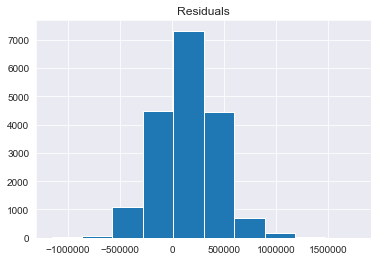

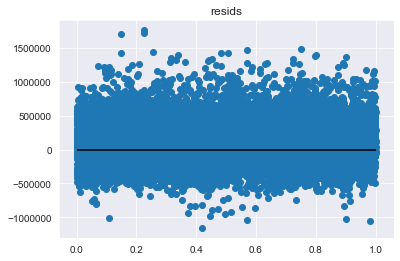

In [117]:
plot_residuals(residuals)

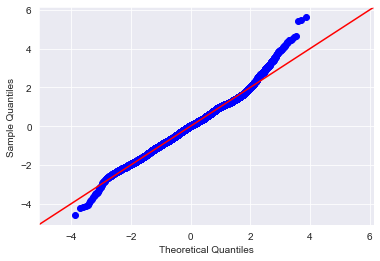

In [118]:
fig = sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True)


# Build Mode in Sklearn

In [119]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [121]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [122]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [123]:
ols.coef_

array([-46493.42504244,  21131.00137887,  77332.71187586,  -7391.15870578,
       222822.67040562, -97562.26153161,  58588.62568653, 272284.60865005,
       259115.76507659,  82011.8877045 ])

In [124]:
ols.intercept_

0.0

In [125]:
# let's get our training predictions
y_train_preds = ols.predict(X_train)
y_train_preds

array([  34763.41752786,  818862.59719554, 1023596.14984198, ...,
       -254304.06484634,  131484.83958766,  972671.95543927])

In [126]:
r2_score(y_train, y_train_preds)

-0.4778180517371846

In [127]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [128]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

-0.4778180517371846

In [129]:
testing_score = ols.score(X_test, y_test)
testing_score

-0.3813366382814356

In [137]:
cv_scores = cross_val_score(ols, X, y, scoring='mse', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

ValueError: 'mse' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [131]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    print(f"train score = {train_score}")
    print(f"test score = {test_score}")
    return ols

In [132]:
make_ols_sklearn(X, y)

train score = -0.46118910498871135
test score = -0.44901270469766286


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)